<a href="https://colab.research.google.com/github/FabioRochaPoeta/wine-case/blob/main/An%C3%A1lise_supervisionada_Regress%C3%A3o_Log%C3%ADstica_Dados_Vinho_Tinto_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vamos analisar vinhos!

![](https://media.giphy.com/media/3zfox4LvqnIas/giphy.gif)

Usaremos um dataset composto por propriedades físico-químicas de vinhos tintos. Temos 1599 amostras e um total de 11 variáveis independentes, descritas abaixo:

 - `fixed acidity`: a maioria dos ácidos envolvidos com vinho (não evaporam prontamente)
 - `volatile acidity`: a quantidade de ácido acético no vinho, que em níveis muito altos pode levar a um gosto desagradável de vinagre
 - `citric acid`: encontrado em pequenas quantidades, o ácido cítrico pode adicionar "leveza" e sabor aos vinhos
 - `residual sugar`: a quantidade de açúcar restante após a fermentação é interrompida, é raro encontrar vinhos com menos de 1 grama / litro e vinhos com mais de 45 gramas / litro são considerados doces
 - `chlorides`: a quantidade de sal no vinho
free sulfur dioxide: a forma livre de SO2 existe em equilíbrio entre o SO2 molecular (como gás dissolvido) e o íon bissulfito; impede o crescimento microbiano e a oxidação do vinho
 - `total sulfur dioxide`: Quantidade de formas livres e encadernadas de S02; em baixas concentrações, o SO2 é quase indetectável no vinho, mas nas concentrações de SO2 acima de 50 ppm, o SO2 se torna evidente no nariz e no sabor do vinho.
 - `density`: a densidade do vinho é próxima a da água, dependendo do percentual de álcool e teor de açúcar
 - `pH`: descreve se o vinho é ácido ou básico numa escala de 0 (muito ácido) a 14 (muito básico); a maioria dos vinhos está entre 3-4 na escala de pH
 - `sulphates`: um aditivo de vinho que pode contribuir para os níveis de gás de dióxido de enxofre (S02), que age como um antimicrobiano e antioxidante
 - `alcohol`: o percentual de álcool no vinho


Existe ainda uma variável chamada `quality`. Essa variável é uma nota de qualidade do vinho que varia de 0 a 10.

In [ ]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"


wine = pd.read_csv(url, sep=";")

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("ticks")
sns.set_context("paper")

In [ ]:
wine.shape

(1599, 12)

<Axes: >

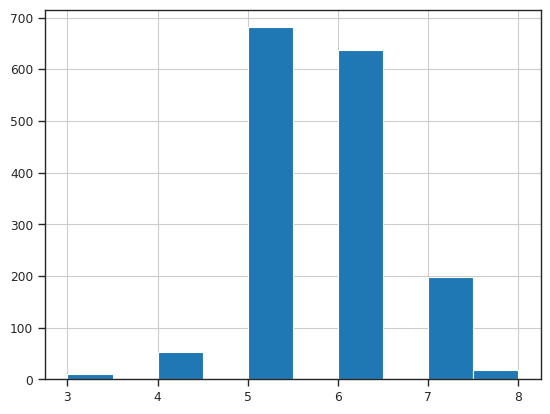

In [ ]:
wine.quality.hist()

In [ ]:
number_of_wines = wine.shape[0]
wine['category'] =  np.zeros((number_of_wines, 1))
wine.loc[wine.quality > 5, "category"] = 1
# wine["category"] = (wine.quality > 5).astype(float)

In [ ]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'category'],
      dtype='object')

In [ ]:
vars = [
   'fixed acidity',
   'volatile acidity',
   'citric acid',
   'residual sugar',
   'chlorides',
   'free sulfur dioxide',
   'total sulfur dioxide',
   'density',
   'pH',
   'sulphates',
   'alcohol',
   'category'
]

#sns.pairplot(wine[vars],
#             hue="category",
#             height=4)

In [ ]:
#sns.pairplot(wine[vars],
#             hue="category",
#             kind="reg",
#             height=4)

<Axes: >

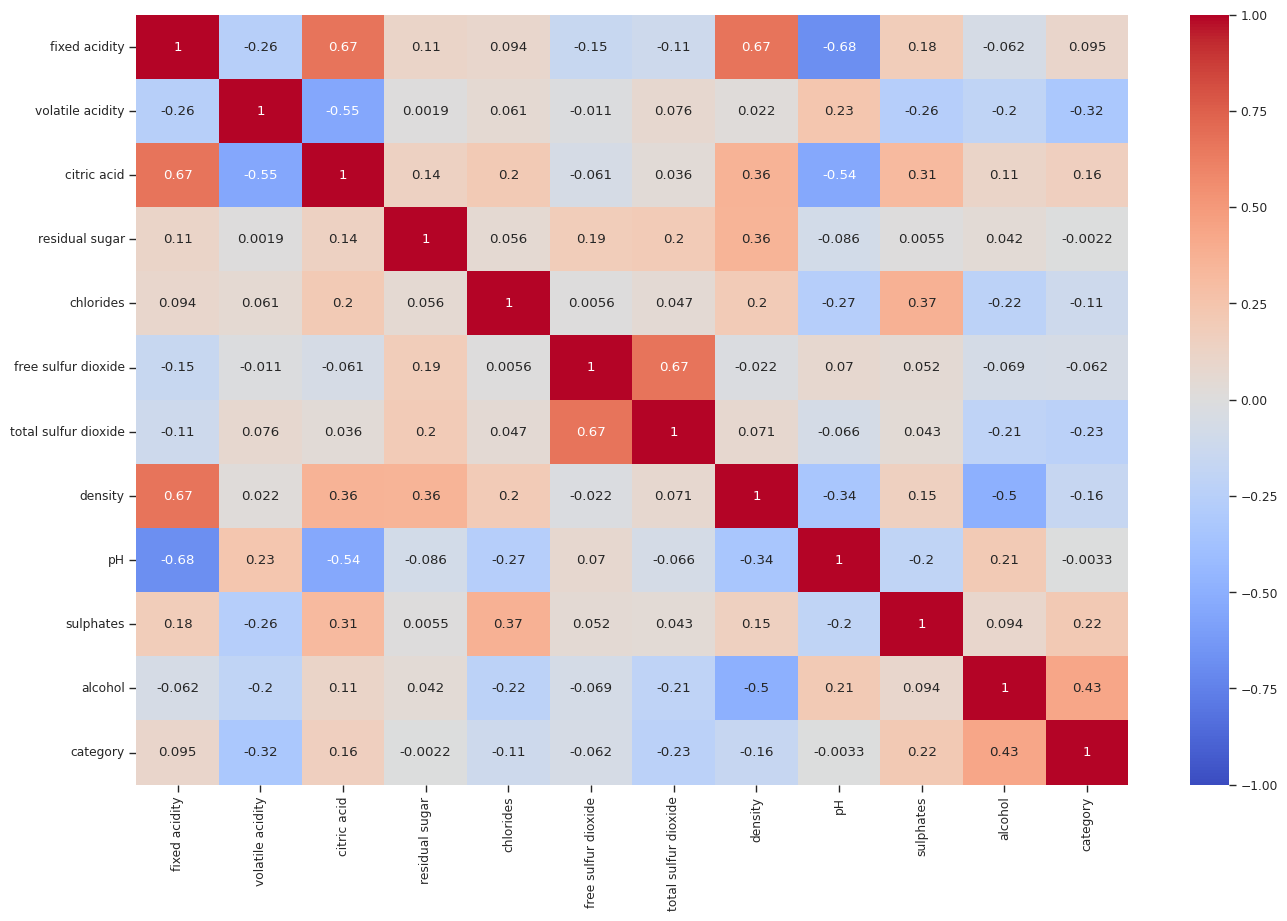

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
sns.heatmap(wine[vars].corr(), vmax=1, vmin=-1, annot=True, ax=ax, cmap="coolwarm")

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
vars = [
   'fixed acidity',
   'volatile acidity',
   'citric acid',
   'residual sugar',
   'chlorides',
   'free sulfur dioxide',
   'total sulfur dioxide',
   'density',
   'pH',
   'sulphates',
   'alcohol',
]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(wine[vars],
                                                    wine['category'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=wine['category'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
logreg = LogisticRegression(max_iter=10000)


logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
y_hat = logreg.predict_proba(X_train_scaled)
print(y_hat.shape)

(1279, 2)


<ipython-input-15-3fda76210974>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat[y_train.values == 1, 1], label="Good", ax=ax)
<ipython-input-15-3fda76210974>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat[y_train == 0, 1], label="Bad", ax=ax)


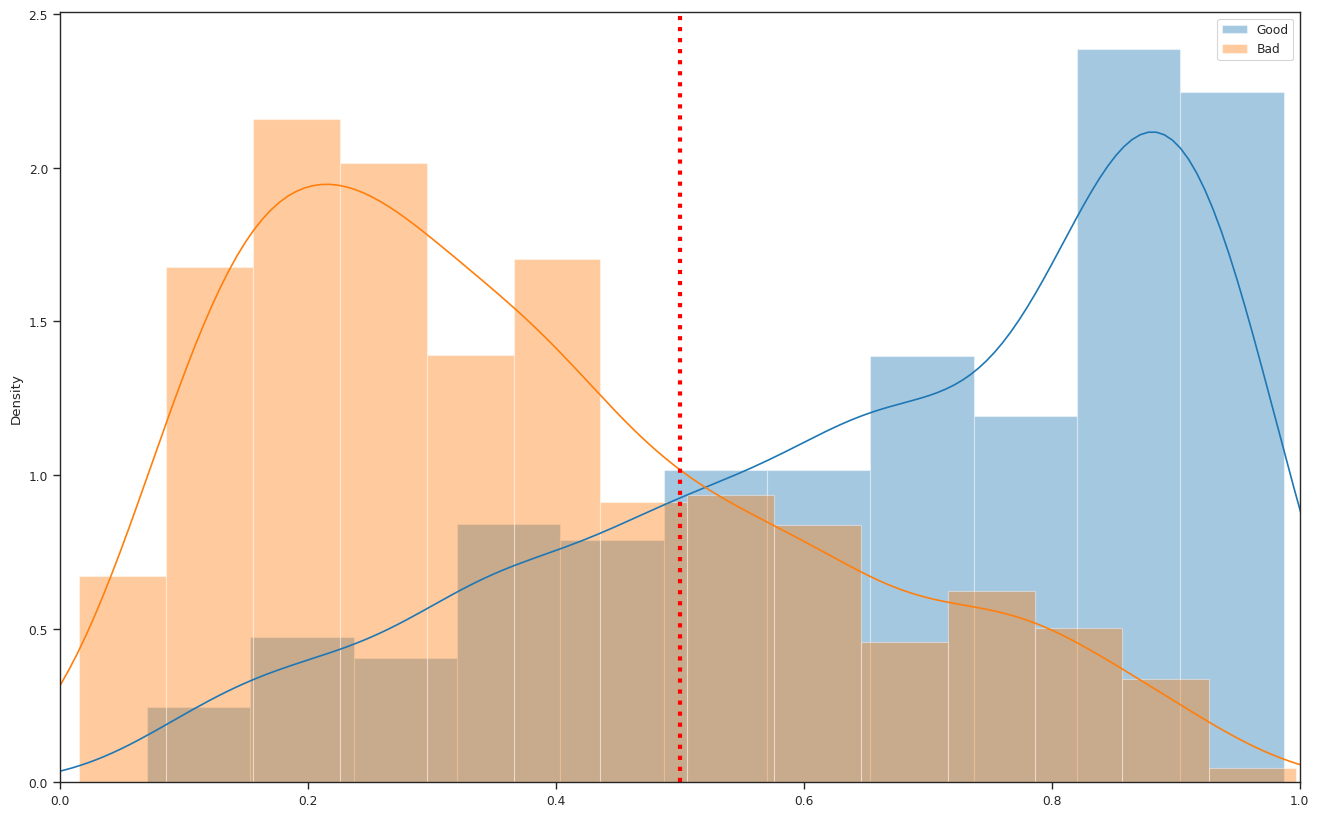

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
sns.distplot(y_hat[y_train.values == 1, 1], label="Good", ax=ax)
ax.set_xlim([0, 1])
sns.distplot(y_hat[y_train == 0, 1], label="Bad", ax=ax)
ax.legend();
ax.axvline(0.5, color="red", ls=":", lw=3)

[Text(0, 0.5, 'Ruim (0)'), Text(0, 1.5, 'Bom (1)')]

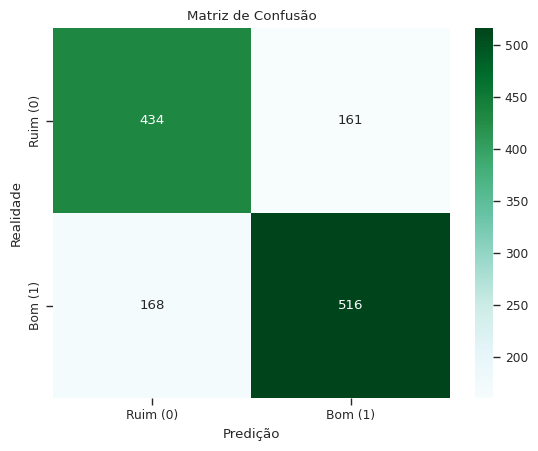

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    RocCurveDisplay
)


y_pred = logreg.predict(X_train_scaled)

cm = confusion_matrix(y_train, y_pred)

#cm = np.array([[434, 161], [1168, 516]])

ax = sns.heatmap(cm, cmap="BuGn", annot=True, fmt='g')
ax.set_xlabel("Predição")
ax.set_ylabel("Realidade")
ax.set_title("Matriz de Confusão")

ax.set_xticklabels(["Ruim (0)", "Bom (1)"])
ax.set_yticklabels(["Ruim (0)", "Bom (1)"])


In [ ]:
y_pred

array([0., 0., 1., ..., 0., 0., 1.])

In [ ]:
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])

print(f"A precisão é {100*  precision:.2f} %")

A precisão é 76.22 %


In [ ]:
accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)

print(f"A acurácia é {100 * accuracy:.2f} %")

A acurácia é 74.28 %


In [ ]:
# Sensibilidade ou taxa de verdadeiro positivo
sensibility = (cm[1, 1] / (cm[1, 1] + cm[1, 0]))
print(f"A sensibilidade é {100 *  sensibility:.2f} %")

A sensibilidade é 75.44 %


In [ ]:
specificity = (cm[0,0] / (cm[0, 0] + cm[0 ,1])) 

print(f"A especificidade é {100 * specificity:.2f} %")

# (1 - specificity) ou taxa de falsos positivos 

A especificidade é 72.94 %


In [ ]:
F1_score = 2 *(sensibility * precision) / (sensibility + precision)

print(f"F1 Score =  {F1_score:.2f}")

F1 Score =  0.76


<ipython-input-80-431b44d6b5b9>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat[y.values == 1, 1], label="Good", ax=ax)
<ipython-input-80-431b44d6b5b9>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat[y == 0, 1], label="Bad", ax=ax)


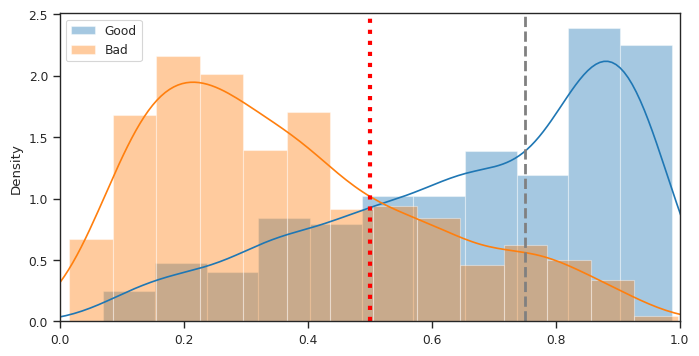

In [ ]:
def plot_distributions(model, X, y, ax=None):
    y_hat = model.predict_proba(X)
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    sns.distplot(y_hat[y.values == 1, 1], label="Good", ax=ax)
    ax.set_xlim([0, 1])
    sns.distplot(y_hat[y == 0, 1], label="Bad", ax=ax)
    ax.legend();
    return ax

ax = plot_distributions(logreg, X_train_scaled, y_train)


ax.axvline(0.5, lw=3, color='red', ls=":")
ax.axvline(0.75, lw=2, color='gray', ls="--")

In [ ]:
print(f"A acurácia é {100 * accuracy_score(y_train, y_pred):.2f} %")
print(f"A sensibilidade é {100 *  recall_score(y_train, y_pred):.2f} %")
print(f"A precisão é {100*  precision_score(y_train, y_pred):.2f} %")

A acurácia é 74.28 %
A sensibilidade é 75.44 %
A precisão é 76.22 %


In [ ]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.72      0.73      0.73       595
         1.0       0.76      0.75      0.76       684

    accuracy                           0.74      1279
   macro avg       0.74      0.74      0.74      1279
weighted avg       0.74      0.74      0.74      1279



# Mudando o ponto de operação

## Objetivo: variar o ponto de operação de um classificador

## Como fazemos: Vamos variar o ponto de corte de 0.01 em 0.01 num espaço que vai de 0. a 1.
## Para cada ponto de corte distinto, iremos calcular a predição, onde o preditor será 1 caso a probabilidade de saida seja maior que o ponto de corte e 0 se for menor










In [ ]:
thresholds = np.linspace(0, 1, 101)
y_hat = logreg.predict_proba(X_train)


for threshold in thresholds:
    predictions = []
    if y_hat > threshold:
        y_pred = 1.
    else:
        y_pred = 0.
    predictions.append(y_pred)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [ ]:

y_hat = logreg.predict_proba(X_train_scaled)
thresholds = np.linspace(0, 1, 101)

def specificity_score(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    specificity = (cm[0,0] / (cm[0, 0] + cm[0 ,1])) 
    return specificity

def predict(model, X, threshold, pos_label=1):
    y_hat = model.predict_proba(X)
    y_pred = []
    for prob_tuple in y_hat:
        prob = prob_tuple[pos_label]
        if prob > threshold:
            y_pred.append(1.)
        else:
            y_pred.append(0.)
    return np.array(y_pred)

#def predict(model, X, threshold, pos_label=1):
#    y_hat = model.predict_proba(X)
#    y_pred = (y_hat[:, pos_label] > threshold)
#    return y_pred.astype(float)
# Probabilidade de ter um vinho bom

recall = []
precision = []
specificity = []
f1 = []
for threshold in thresholds:
    y_pred_thr = predict(logreg, X_train_scaled, threshold)
    recall.append(recall_score(y_train, y_pred_thr))
    precision.append(precision_score(y_train, y_pred_thr))
    specificity.append(specificity_score(y_train, y_pred_thr))
    f1.append(f1_score(y_train, y_pred_thr))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


f1 máximo: 0.78 - ponto de operação: 0.44
Recall: 0.82 - Precision: 0.74


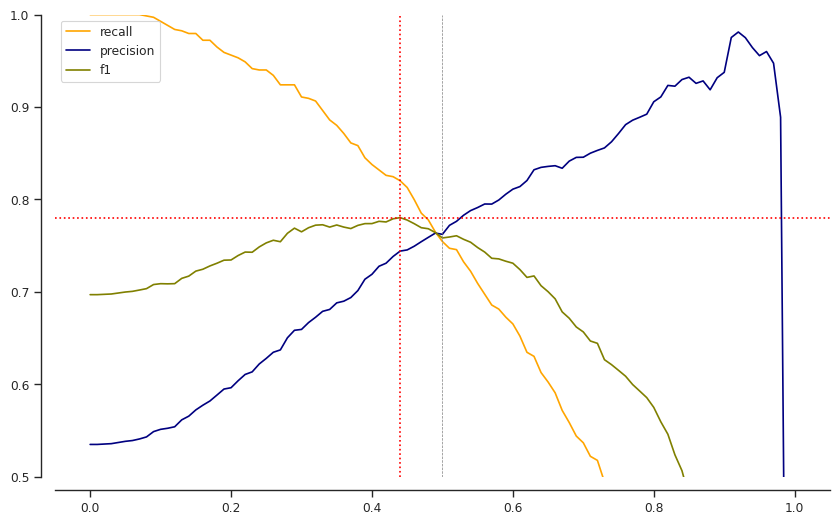

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(thresholds, recall, color="orange", label="recall")
ax.plot(thresholds, precision, color="navy", label="precision")
ax.plot(thresholds, f1, color="olive", label="f1")

f1_max = max(f1)
thr_arg_max = np.argmax(f1)
thr_max = thresholds[thr_arg_max]

ax.axvline(thr_max, color="red", ls=":")
ax.axvline(0.5, color="gray",lw=0.5, ls="--")
ax.axhline(f1_max, color="red", ls=":")

ax.legend()
ax.set_ylim([0.5, 1])
print(f"f1 máximo: {f1_max:.2f} - ponto de operação: {thr_max:.2f}")
print(f"Recall: {recall[thr_arg_max]:.2f} - Precision: {precision[thr_arg_max]:.2f}")
sns.despine(offset=10)

In [ ]:
# True positive rate ou taxa de verdadeiro positivo
tpr = recall
# False positive rate ou taxa de falso positivos
fpr = [(1 - s) for s in specificity]

(0.0, 1.0)

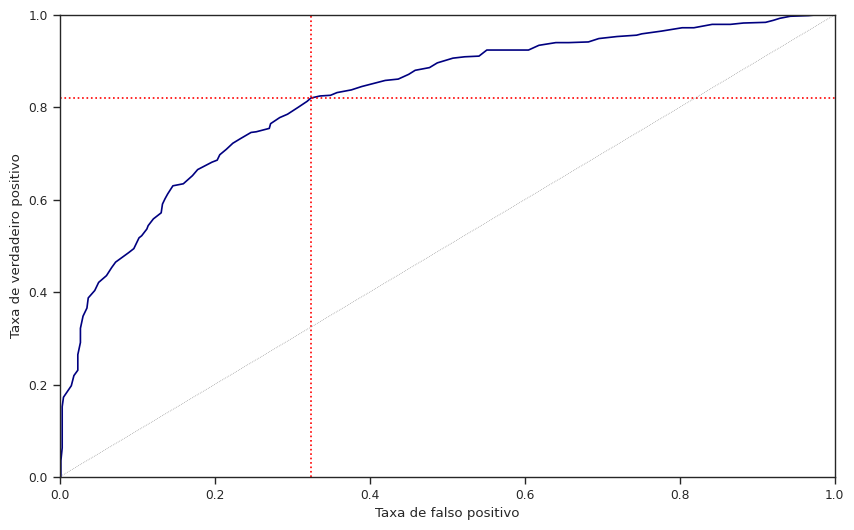

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(fpr, tpr, color="navy")
ax.set_ylabel("Taxa de verdadeiro positivo")
ax.set_xlabel("Taxa de falso positivo")

ax.axvline(fpr[thr_arg_max], color="red", ls=":")
ax.axhline(tpr[thr_arg_max], color="red", ls=":")
ax.plot(thresholds, thresholds, color= "gray", ls=":", lw=0.5)
ax.set_ylim([0., 1.])
ax.set_xlim([0., 1.])

In [ ]:
auc_score = auc(fpr, tpr)
print(f"Area Under Curve (AUC): {auc_score:.2f}")

Area Under Curve (AUC): 0.82


In [ ]:
from sklearn.metrics import RocCurveDisplay


def get_f1_score_list(model, X, y, thresholds):
    list_of_f1 = []
    for threshold in thresholds:
        y_pred = predict(model, X, threshold)
        f1 = f1_score(y, y_pred)
        list_of_f1.append(f1)
    return list_of_f1

def get_max_f1_score(model, X, y, thresholds):
    list_of_f1 = get_f1_score_list(model, X, y, thresholds)
    f1_max = max(list_of_f1)
    f1_arg_max = np.argmax(list_of_f1)
    threshold_max = thresholds[f1_arg_max]
    return f1_max, threshold_max, f1_arg_max


fpr, tpr, thresholds = roc_curve(y_train, y_hat[:, 1], pos_label=1)
auc_score = auc(fpr, tpr)
f1_max, threshold_max, f1_arg_max =  get_max_f1_score(logreg,
                                                      X_train_scaled,
                                                      y_train,
                                                      thresholds)


print(f"Area Under Curve (AUC): {auc_score:.2f}")
print(f"Maximum F1 : {f1_max:.2f} at {threshold_max:.3f}")

Area Under Curve (AUC): 0.82
Maximum F1 : 0.78 at 0.438


<ipython-input-80-431b44d6b5b9>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat[y.values == 1, 1], label="Good", ax=ax)
<ipython-input-80-431b44d6b5b9>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat[y == 0, 1], label="Bad", ax=ax)


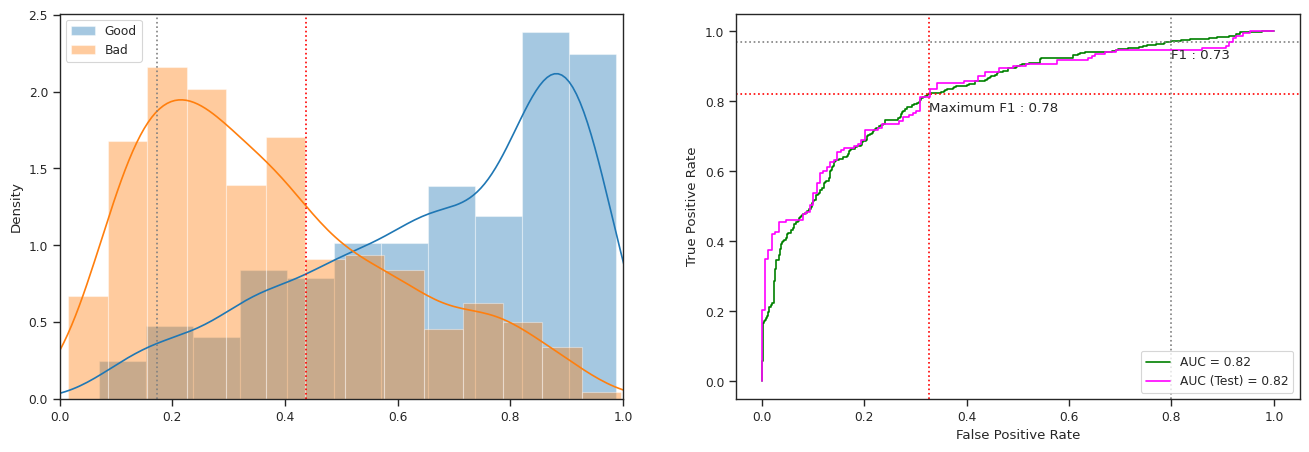

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

threshold_random = 500

# DISTRIBUTION
plot_distributions(logreg, X_train_scaled, y_train, ax=axes[0])
axes[0].axvline(threshold_max, color="red", ls=":")
axes[0].axvline(thresholds[threshold_random], color="gray", ls=":")

# ROC CURVE
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_score).plot(ax=axes[1],color="green")
axes[1].axvline(fpr[f1_arg_max], color="red", ls=":")
axes[1].axhline(tpr[f1_arg_max], color="red", ls=":")
axes[1].annotate(f"Maximum F1 : {f1_max:.2f}", (fpr[f1_arg_max], tpr[f1_arg_max] - 0.05))


f1_list = get_f1_score_list(logreg, X_train_scaled, y_train, thresholds)


axes[1].axvline(fpr[threshold_random], color="gray", ls=":")
axes[1].axhline(tpr[threshold_random], color="gray", ls=":")

axes[1].annotate(f"F1 : {f1_list[threshold_random]:.2f}",
                        (fpr[threshold_random],
                         tpr[threshold_random] - 0.05))


# ROC CURVE Test
y_hat_test = logreg.predict_proba(X_test_scaled)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_hat_test[:, 1], pos_label=1)
auc_score_test = auc(fpr_test, tpr_test)

RocCurveDisplay(fpr=fpr_test, tpr=tpr_test, roc_auc=auc_score_test).plot(ax=axes[1],
                                                                         label=f"AUC (Test) = {auc_score_test:.2}",
                                                                         color="magenta")